---
# Help Wanted
---

Name - Date

In [1]:
# covert to markdown and add image here
# <img src="https://s19538.pcdn.co/wp-content/uploads/2018/08/Car-Gurus-Logo.jpg" alt="Car Gurus" title="Car Gurus Logo" width="600" height="300" />

---
## Executive Summary
---

**Goals:**
- #####

**Conclusions/Takaways:**
- #####

**Next Steps/Recommendations:**
- #####

---
## Plan
---

- [x] Create README.md with data dictionary, project and business goals, come up with initial hypotheses.
- [x] Acquire data from Kaggle, save to local .csv and create a function to automate this process. Save the function in an acquire.py file to import into the Final Report Notebook.
- [x] Clean and prepare data for the first iteration through the pipeline, MVP preparation. Create a function to automate the process, store the function in a prepare.py module, and prepare data in Final Report Notebook by importing and using the funtion.
- [x] Clearly define at least two hypotheses, set an alpha, run the statistical tests needed, reject or fail to reject the Null Hypothesis, and document findings and takeaways.
- [x] Establish a baseline accuracy and document well.
- [x] Train several different regression models.
- [x] Evaluate models on train and validate datasets.
- [x] Choose the model with that performs the best and evaluate that single model on the test dataset.
- [x] Document conclusions, takeaways, and next steps in the Final Report Notebook.
- [x] Iterate back through the pipeline imporving each phase as time permits

---
## Imports
---

In [2]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# no yelling in the library
import warnings
warnings.filterwarnings("ignore")

# sklearn imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# pickle for reloading model object
import pickle

# visualization settings
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)
plt.style.use('seaborn-darkgrid')
sns.set_palette('tab20')

# custom modules
import wrangle as w
import explore as e

---
## Acquire
---

### Takeaways:
- #####

---
## Prepare
---

### Clean

---

#### Preparation Performed:
- #####

---
## Explore 
---

### All Level 3 Industries
---

#### Takeaways:
- #####

---
### Demographic Subgroups
---


#### Takeaways:
- ######

---
### Clustering
---


In [3]:
# load model
filename = 'finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

KMeans(n_clusters=7, random_state=527)

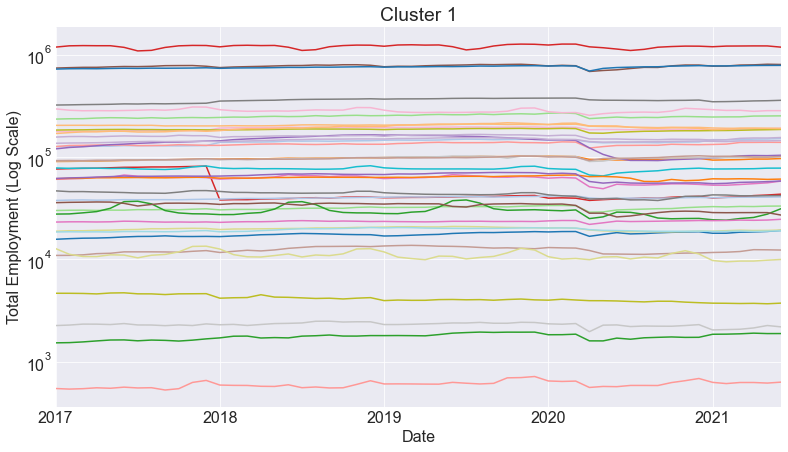

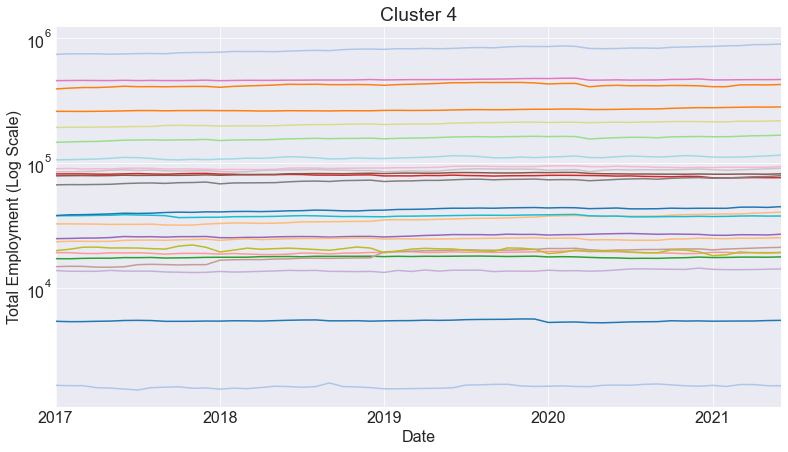

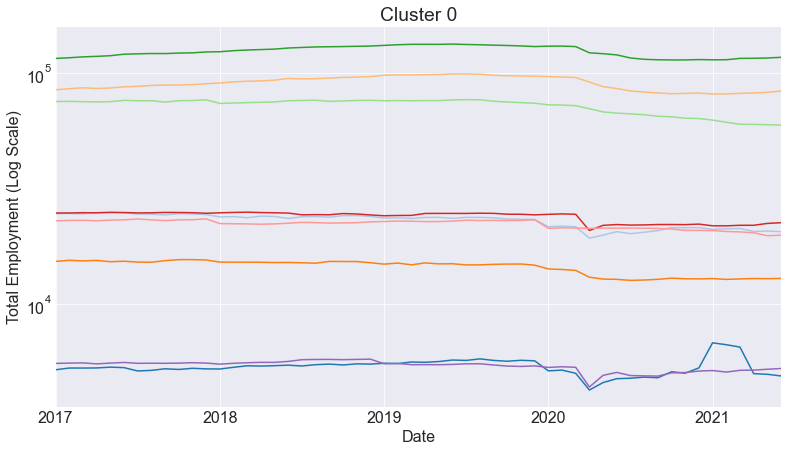

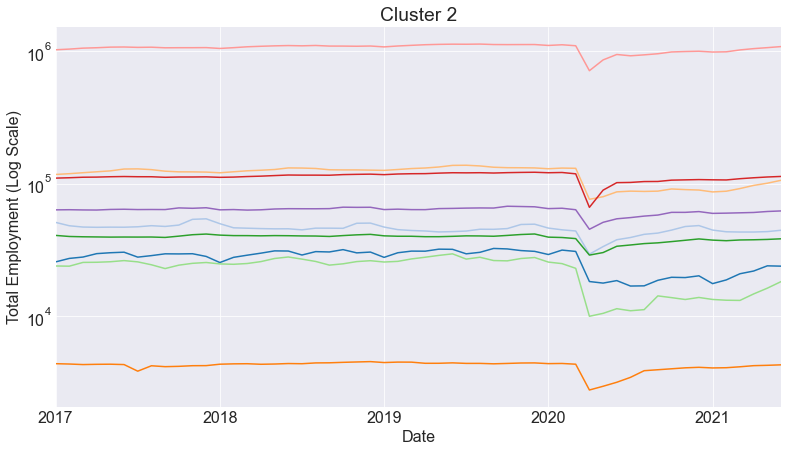

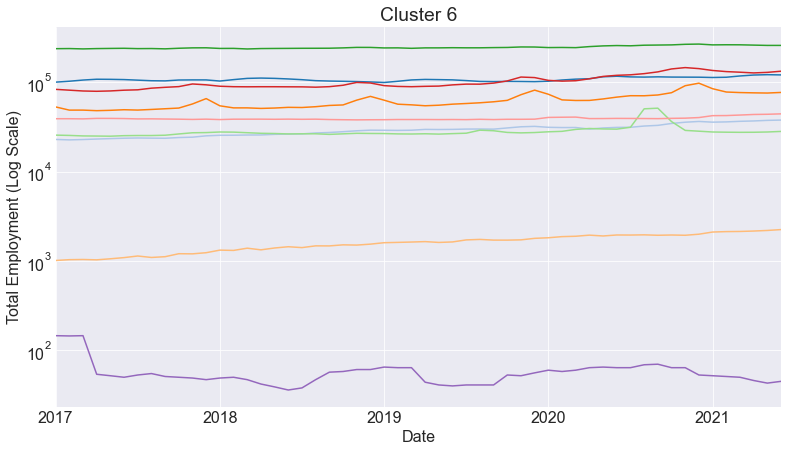

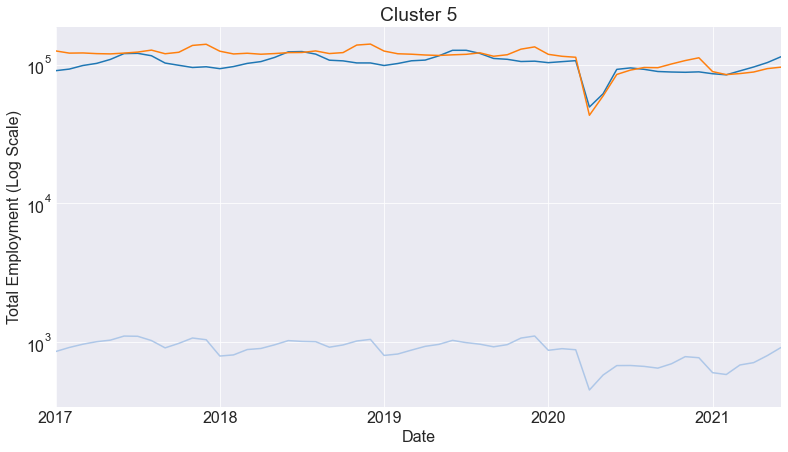

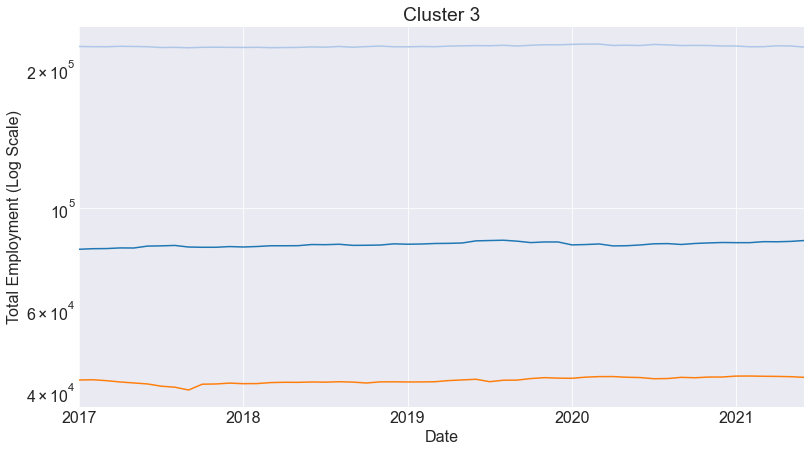

In [4]:
# acquire and prep data
df = w.get_tx_data()
# subset data into a dictionary of dfs
industry_df_dict, ind_list = w.create_df_dict(df)
# charaterize series of data for each industry to make time series data into continuous data we can cluster on
char_df = e.create_char_df(industry_df_dict, ind_list)
# scale these characterizations for clustering
scaled_char_df = e.scale(char_df, MinMaxScaler())
# cluster and plot results
char_df = e.load_cluster_and_plot_no_legend(loaded_model, scaled_char_df, char_df, df)

---
**Human-Friendly Labels for each Cluster:**
- Moderate Negative Impact, Quick Recovery
- Positively Impacted
- Significant Negative Impact, Mostly Recovered
- Significant Negative Impact, Mostly Recovered, Highly Seasonal
- No Impact
- Moderate Negative Impact, Slow or No Recovery
- Minor Negative Impact, Quick Recovery
**See if you can identify which is which!**

---

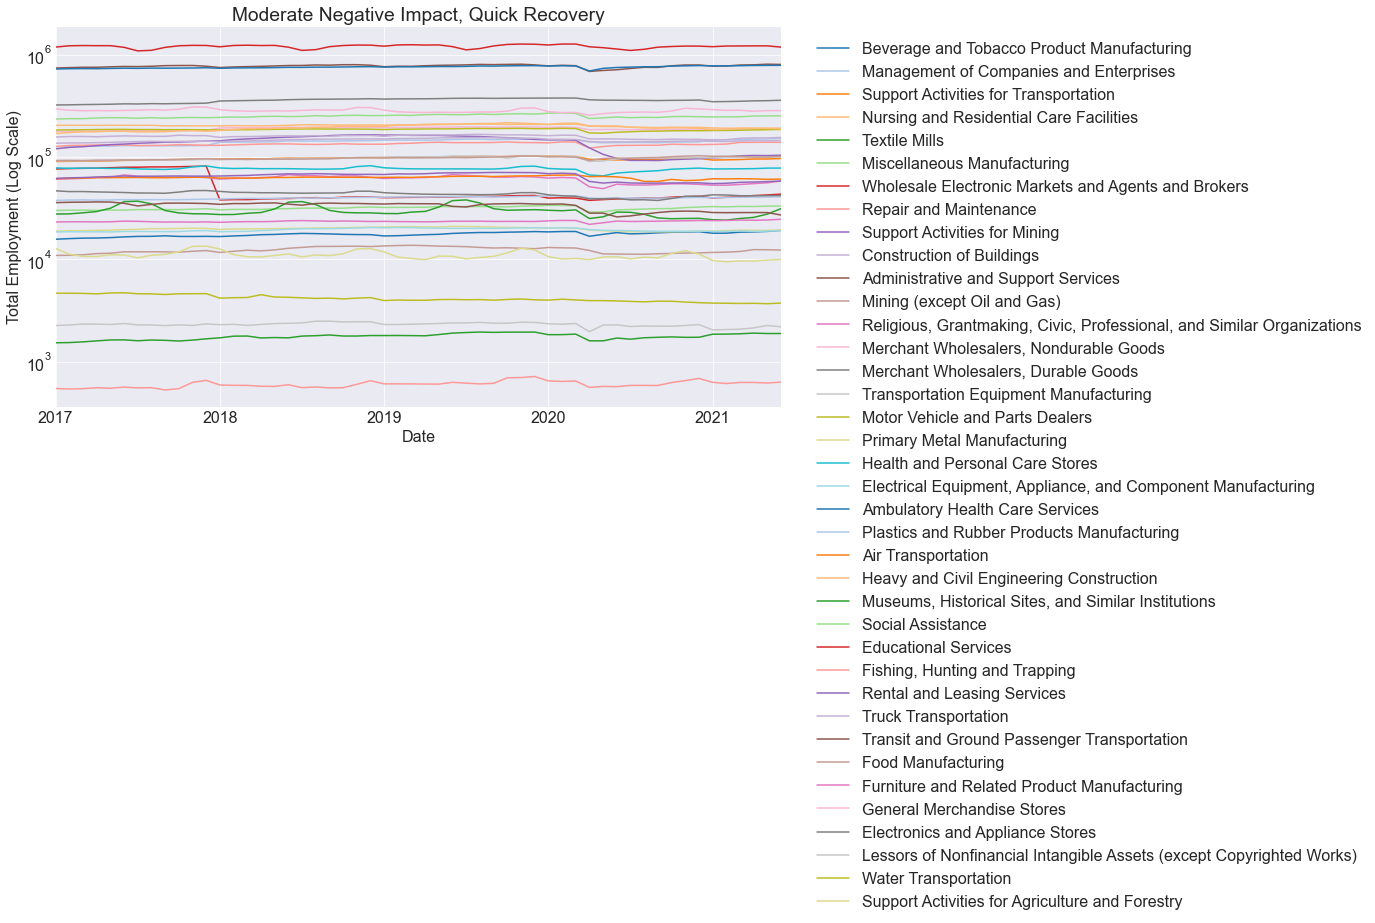

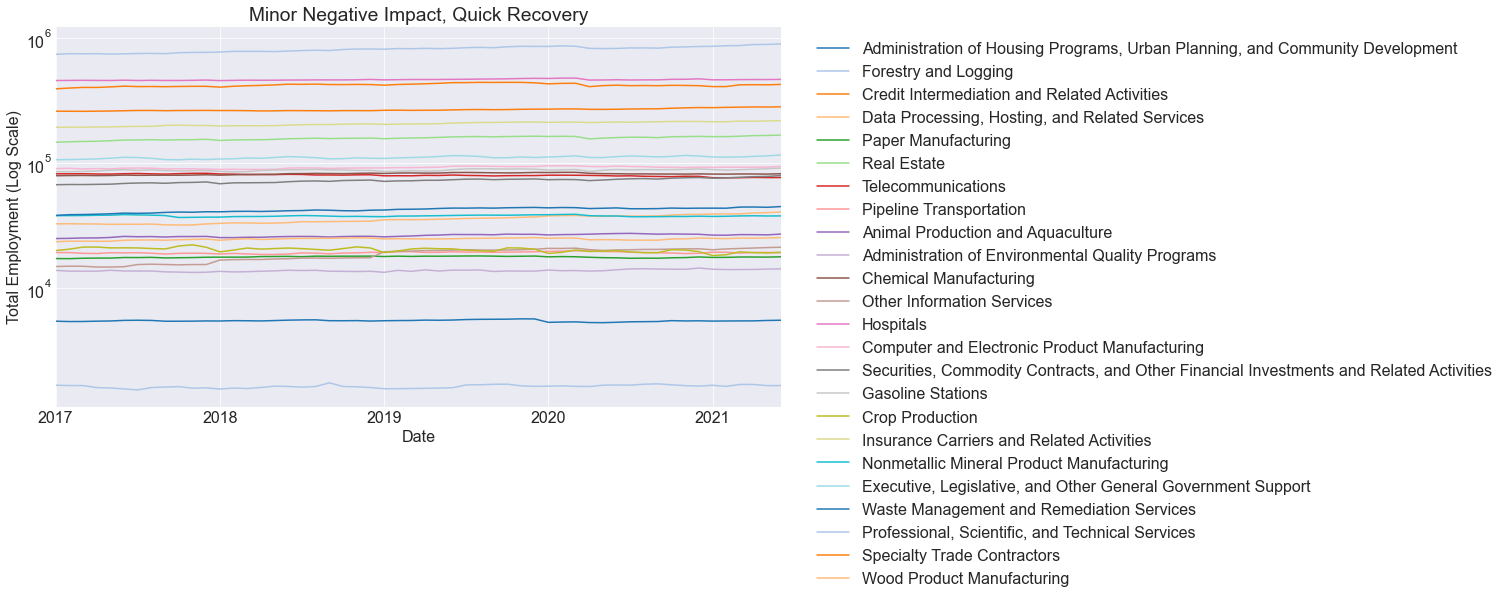

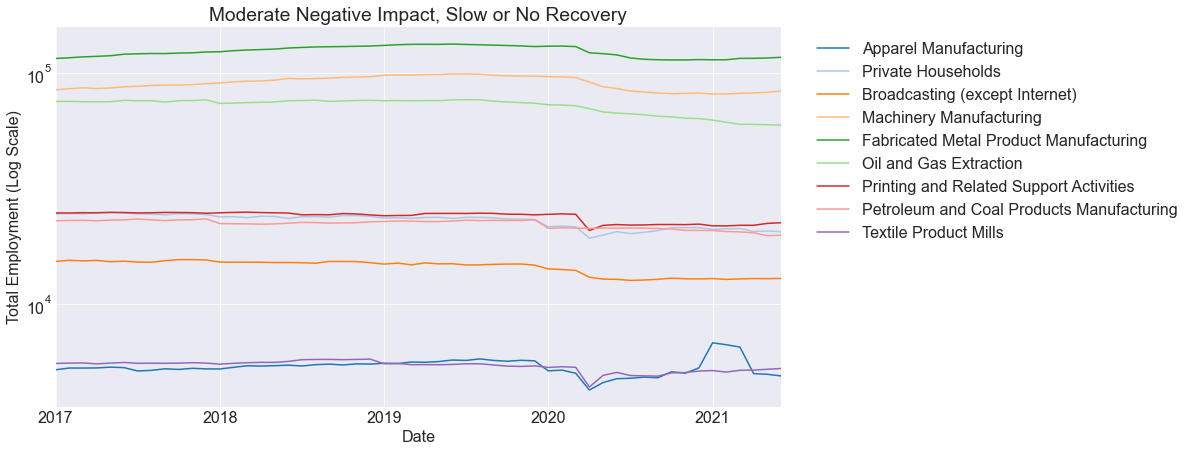

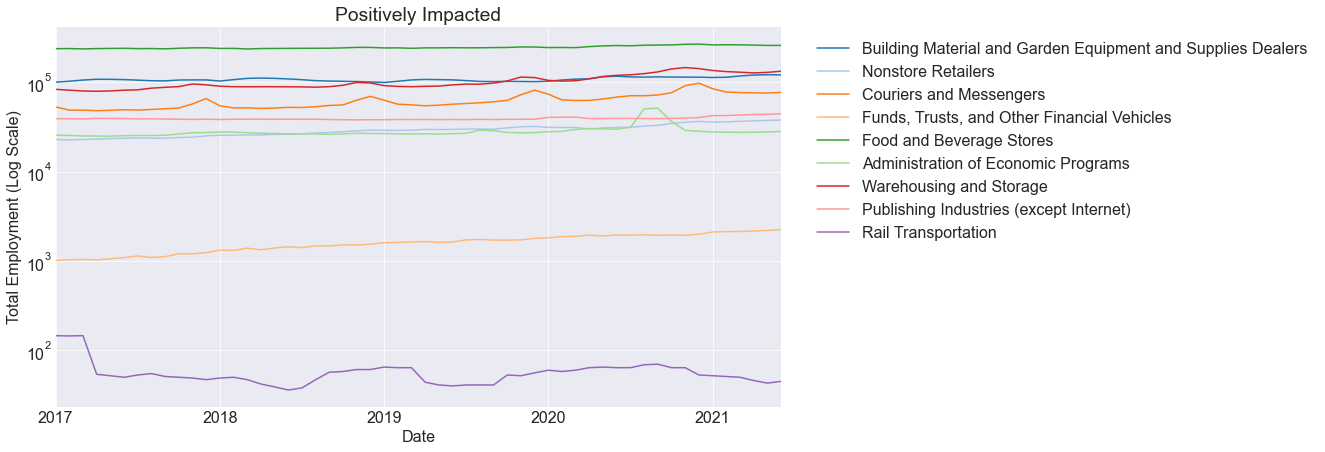

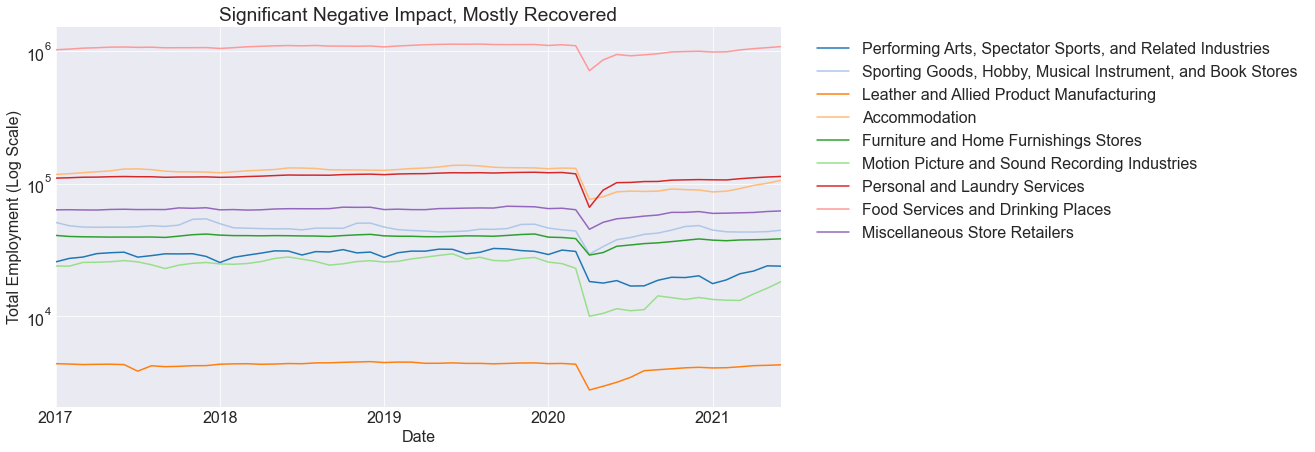

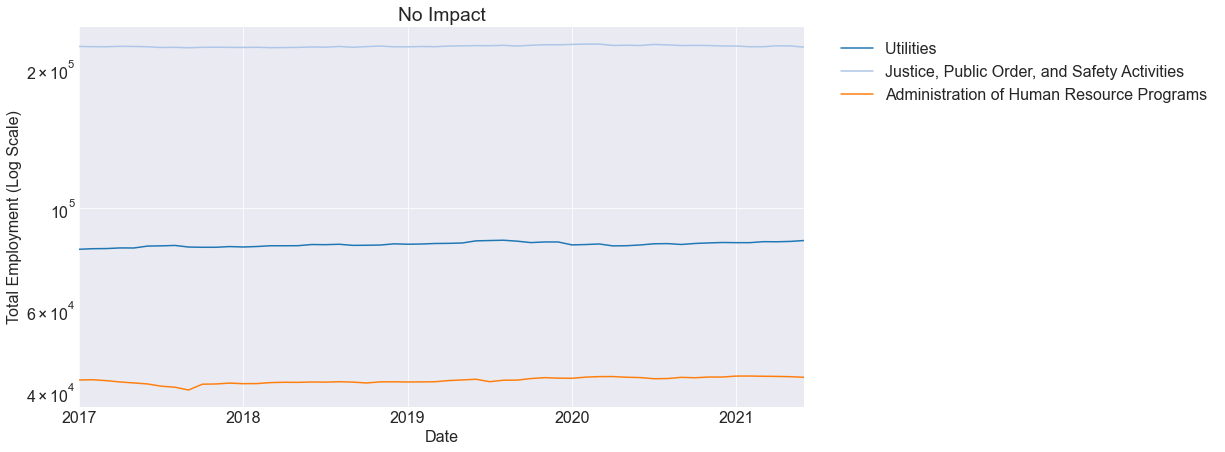

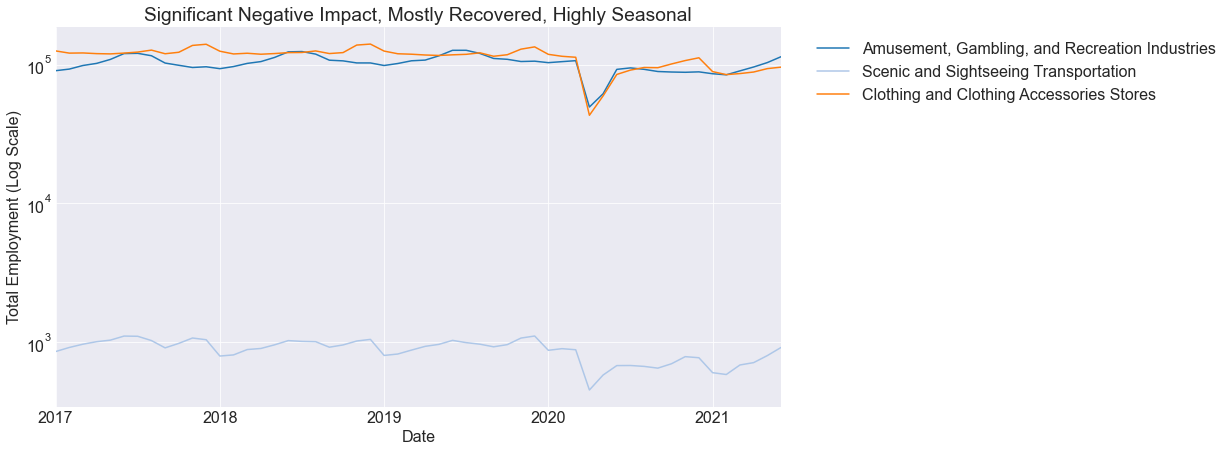

In [5]:
char_df = e.load_cluster_and_plot_w_legend(loaded_model, scaled_char_df, char_df, df)

In [6]:
# this function will do whole pipeline from acquire to final clustering plots
# e.load_acquire_to_cluster(loaded_model)

#### Takeaways:
- Clustering models were able to group times series data for different industries into groups that make sense
- The clusters produced along with number of industries in each group were:
    - Moderate Negative Impact, Quick Recovery : 38
    - Minor Negative Impact, Quick Recovery : 24
    - Moderate Negative Impact, Slow or No Recovery : 9
    - Significant Negative Impact, Mostly Recovered : 9
    - Positively Impacted : 9
    - Significant Negative Impact, Mostly Recovered, Highly Seasonal : 3
    - No Impact: 3

---
### Explore Takeaways:
- #####

---
## Conclusions and Next Steps
---

**Conclusions/Takaways:**
- #####

**Next Steps/Recommendations:**
- #####